In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set()

In [2]:
filepath_home= 'D:/Dacon_Psychological_disposition/'
filepath_out = 'C:/임시/Dacon_Psychological_disposition/' 
train = pd.read_csv(filepath_out+'train.csv')
test = pd.read_csv(filepath_out+'test_x.csv')

In [3]:
# 분할 지점 저장해두고 데이터 통합 후 전처리
split_point = train.shape[0]
data = pd.concat([train.drop('voted',axis=1),test],ignore_index=True)

In [6]:
question_cols=[ 'QaA', 'QbA', 'QcA','QdA', 'QeA', 'QfA', 
              'QgA', 'QhA', 'QiA', 'QjA', 'QkA', 'QlA', 
              'QmA','QnA', 'QoA','QpA', 'QqA', 'QrA', 
              'QsA','QtA']
answer_time_cols=['QaE', 'QbE', 'QcE','QdE', 'QeE', 'QfE', 
                   'QgE', 'QhE', 'QiE','QjE', 'QkE', 'QlE', 
                   'QmE', 'QnE','QoE', 'QpE', 'QqE', 'QrE', 
                   'QsE','QtE']

question_data = data[question_cols].copy()
answer_time_data = data[answer_time_cols].copy()

# 1. 질문 답변 정보

__수치적으로 한쪽으로 쏠린 질문들이 있나 : mean 값 1 or 5 에 근접한지__ 

In [9]:
question_data.mean()[(question_data.mean()<2.5)|(question_data.mean()>3.5)]

QaA    2.122498
QcA    3.662883
QdA    1.745902
QeA    2.318861
QfA    2.171238
QhA    2.319002
QjA    3.576983
QkA    3.813986
QlA    4.326311
QmA    3.512589
dtype: float64

QaA  : 범죄자들과 다른 일반 사람들의 가장 큰 차이점은, 범죄자들이 잡힐만큼 멍청하다는 것이다.  
QcA  : 누군가를 완전히 믿는 사람은 고생을 자처하는 것이다.  
QdA  : hidden  
QeA  : P.T. Barnum이 '매 분마다 선천적으로 잘 속는 사람이 태어난다' 라고 말한 것은 틀린 말이다.  
QfA  : 누군가에게 거짓말 하는 것은 변명의 여지가 없다.  
QhA  : 대부분의 사람들은 그들의 재산을 잃은 것 보다 부모의 죽음을 더 빨리 잊는다.  
QjA  : 모든 사람에게는 악한 경향이 있고, 기회만 주어진다면 그 성향이 표현된다고 가정하는 것이 가장 안전하다.  
QkA  : 대체로 겸손하고 정직한 것이, 중요하고 부정직한 것보다 낫다.  
QlA  : hidden  
QmA  : 요령이 없다면 앞으로 나아가기 힘들다.  

__각 질문 답변 시각화__

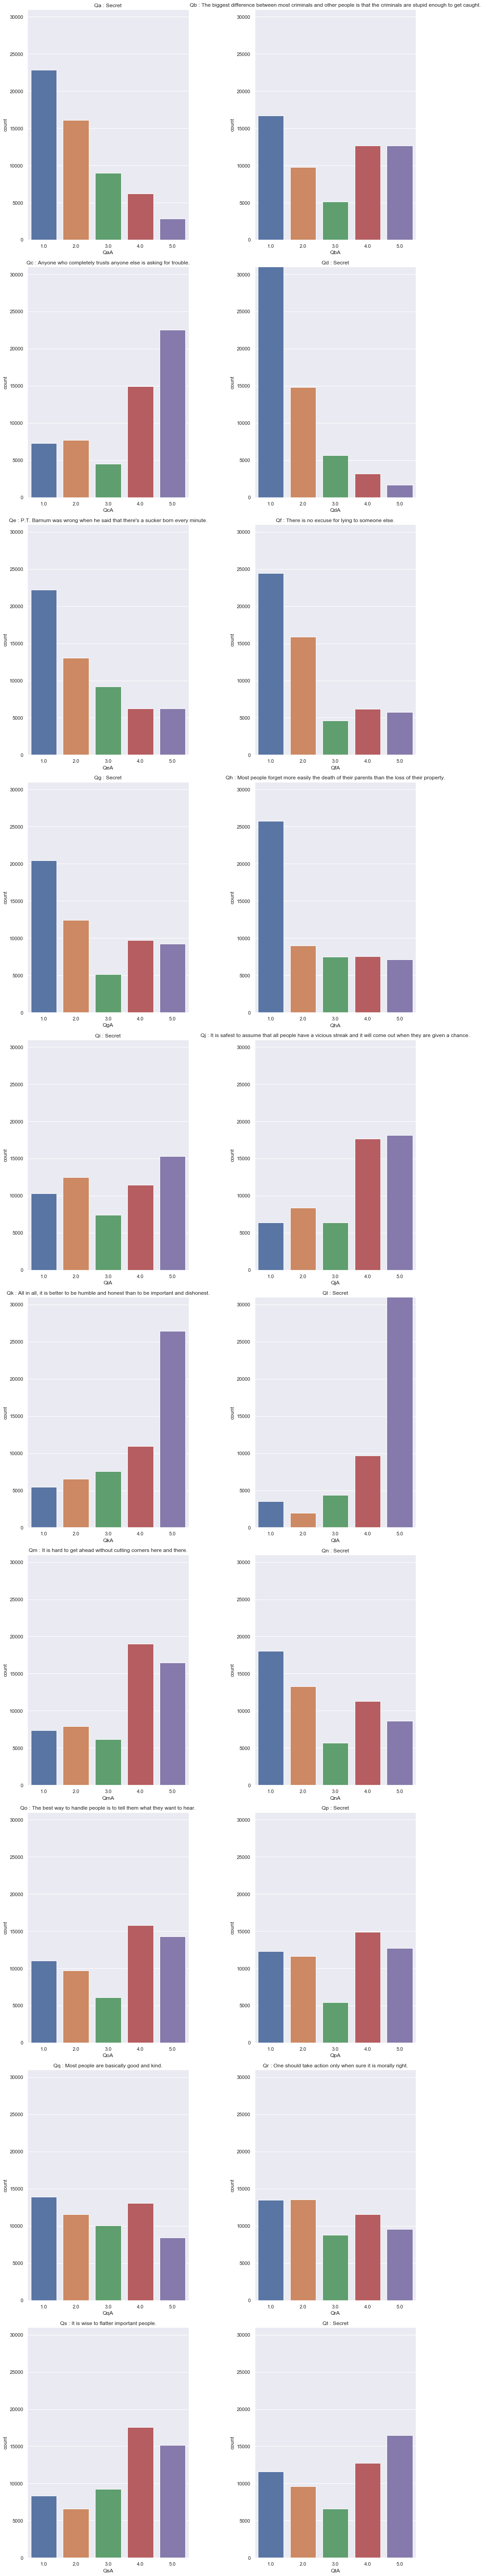

In [10]:
titles = '''Qa : Secret
Qb : The biggest difference between most criminals and other people is that the criminals are stupid enough to get caught.
Qc : Anyone who completely trusts anyone else is asking for trouble.
Qd : Secret
Qe : P.T. Barnum was wrong when he said that there's a sucker born every minute.
Qf : There is no excuse for lying to someone else.
Qg : Secret
Qh : Most people forget more easily the death of their parents than the loss of their property.
Qi : Secret
Qj : It is safest to assume that all people have a vicious streak and it will come out when they are given a chance.
Qk : All in all, it is better to be humble and honest than to be important and dishonest.
Ql : Secret
Qm : It is hard to get ahead without cutting corners here and there.
Qn : Secret
Qo : The best way to handle people is to tell them what they want to hear.
Qp : Secret
Qq : Most people are basically good and kind.
Qr : One should take action only when sure it is morally right.
Qs : It is wise to flatter important people.
Qt : Secret'''.split('\n')

plt.figure(figsize = (15,80))
for idx,letter in enumerate(list('abcdefghijklmnopqrst')):
    plt.subplot(10,2,idx+1)
    sns.countplot(data['Q'+letter+'A'])
    plt.ylim((0,31000))
    plt.title(titles[idx])
plt.tight_layout()

# 2. 질문 답변시간 정보

__칼럼별로 데이터 범위가 어느 정도인지__

In [44]:
answer_time_data.describe().iloc[[3,5,1,7]]

,QaE,QbE,QcE,QdE,QeE,QfE,QgE,QhE,QiE,QjE,QkE,QlE,QmE,QnE,QoE,QpE,QqE,QrE,QsE,QtE
min,2.500000e+01,2.500000e+01,2.500000e+01,2.600000e+01,2.500000e+01,0.000000e+00,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+01,0.000000e+00,25.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+01,2.500000e+01,2.500000e+01
50%,5.570000e+02,1.220000e+03,8.990000e+02,9.300000e+02,1.153000e+03,7.110000e+02,7.730000e+02,1.464000e+03,1.800000e+03,1.259000e+03,1.179000e+03,1.124000e+03,9.080000e+02,596.000000,8.830000e+02,9.690000e+02,6.520000e+02,1.116000e+03,7.500000e+02,1.020000e+03
mean,9.213969e+02,2.226812e+03,2.112839e+03,1.507233e+03,1.901100e+03,1.732913e+03,1.328477e+03,4.072170e+03,4.155097e+03,2.586398e+03,2.123984e+03,3.387120e+03,1.930045e+03,949.028428,1.487754e+03,1.647917e+03,1.150679e+03,2.519753e+03,1.191141e+03,2.133935e+03
max,2.413960e+06,5.580395e+06,3.630804e+07,1.976418e+06,1.919926e+06,1.176370e+07,1.324128e+06,1.070860e+08,1.703586e+07,9.910006e+06,5.855026e+06,7.754351e+07,1.410832e+07,606694.000000,2.135423e+06,4.650742e+06,4.277510e+06,3.159328e+07,1.286581e+06,1.155650e+07


__전체적으로 한 질문당 데이터 범위가 어느 정도인지__ 

In [45]:
answer_time_data.describe().iloc[[3,5,1,7]].mean(axis=1) # 정상적인 스케일이 아님 10^0 ~ 10^7

min     1.380000e+01
50%     9.981500e+02
mean    2.053290e+03
max     1.744660e+07
dtype: float64

__결측이라 봐야하는 0값은 칼럼별로 어느정도 있는지__ 

In [48]:
(answer_time_data==0).sum() # 극 소수

QaE    0
QbE    0
QcE    0
QdE    0
QeE    0
QfE    1
QgE    0
QhE    1
QiE    1
QjE    1
QkE    2
QlE    0
QmE    1
QnE    0
QoE    1
QpE    1
QqE    1
QrE    0
QsE    0
QtE    0
dtype: int64

__이상치라 봐야하는 값들은 칼럼별로 어느정도 있는지 ==> 일단 그림으로 보아하니 무진장 많다__

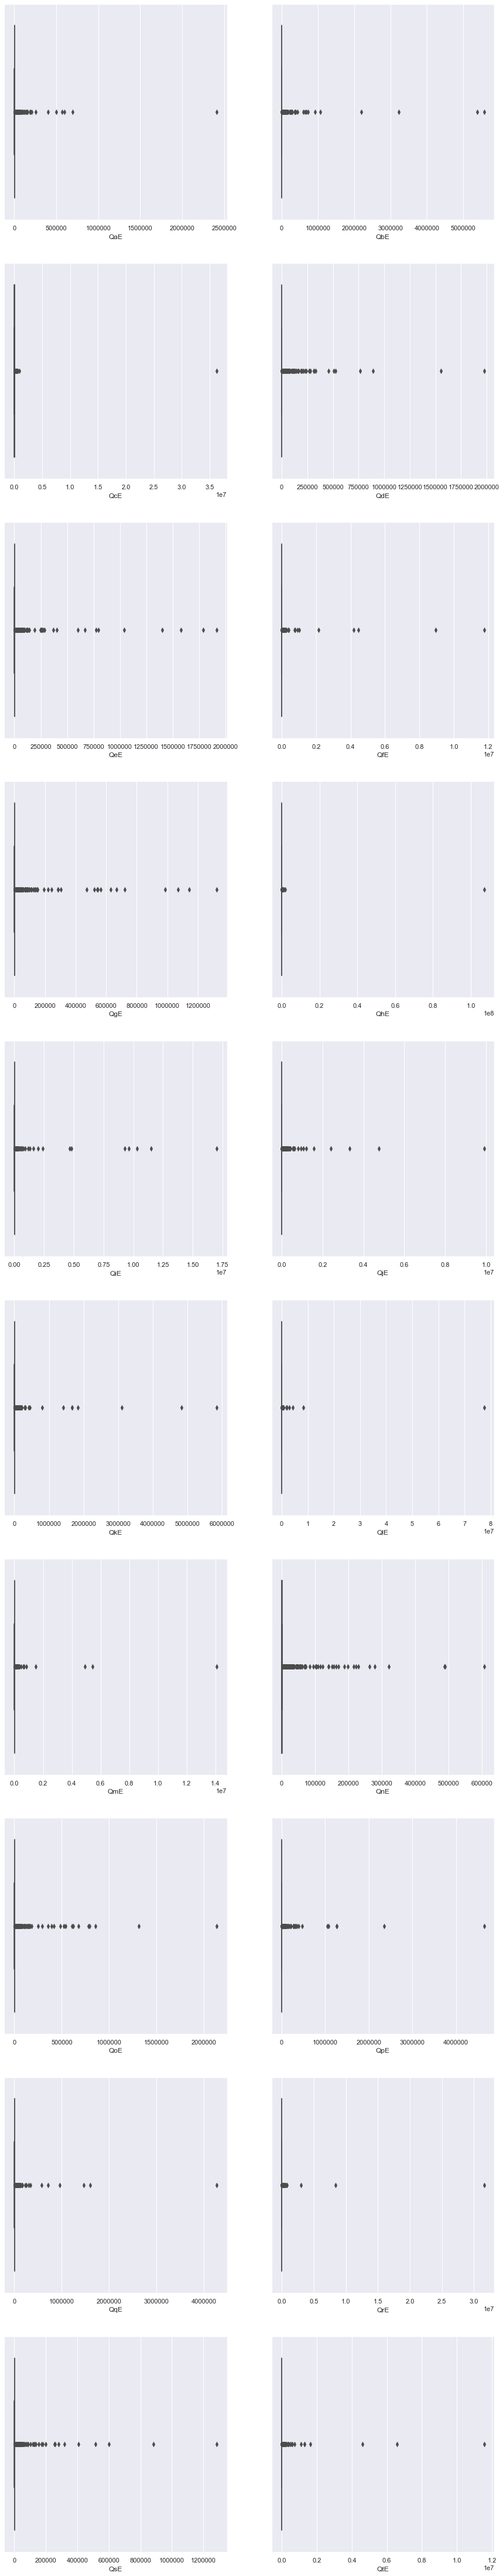

In [51]:
plt.figure(figsize =(15,80))
for idx, letter in enumerate(list('abcdefghijklmnopqrst')):
    plt.subplot(10,2,idx+1)
    sns.boxplot(answer_time_data['Q'+letter+'E'])

__정확히 몇개 정도인가 이상치가==> 칼럼별로 4~5천개씩==>너무 많아__

In [54]:
def trim_outlier(col):
    q1 = col.describe()[4]
    q3 = col.describe()[6]
    iqr = q3-q1
    low_bound = q1-(1.5*iqr)
    high_bound = q3+(1.5*iqr)
    return ((col<low_bound)|(col>high_bound)).sum()

answer_time_data.apply(trim_outlier)

QaE    4219
QbE    4608
QcE    4571
QdE    4459
QeE    4788
QfE    4584
QgE    4386
QhE    4221
QiE    4555
QjE    5171
QkE    4496
QlE    4284
QmE    4838
QnE    4398
QoE    4451
QpE    4336
QqE    4244
QrE    4751
QsE    4662
QtE    4807
dtype: int64

__스케일을 로그 스케일로 바꾸면 좀 양호한지 ==> 여전히 이상적이지 않지만 극극극단치는 제거 가능__

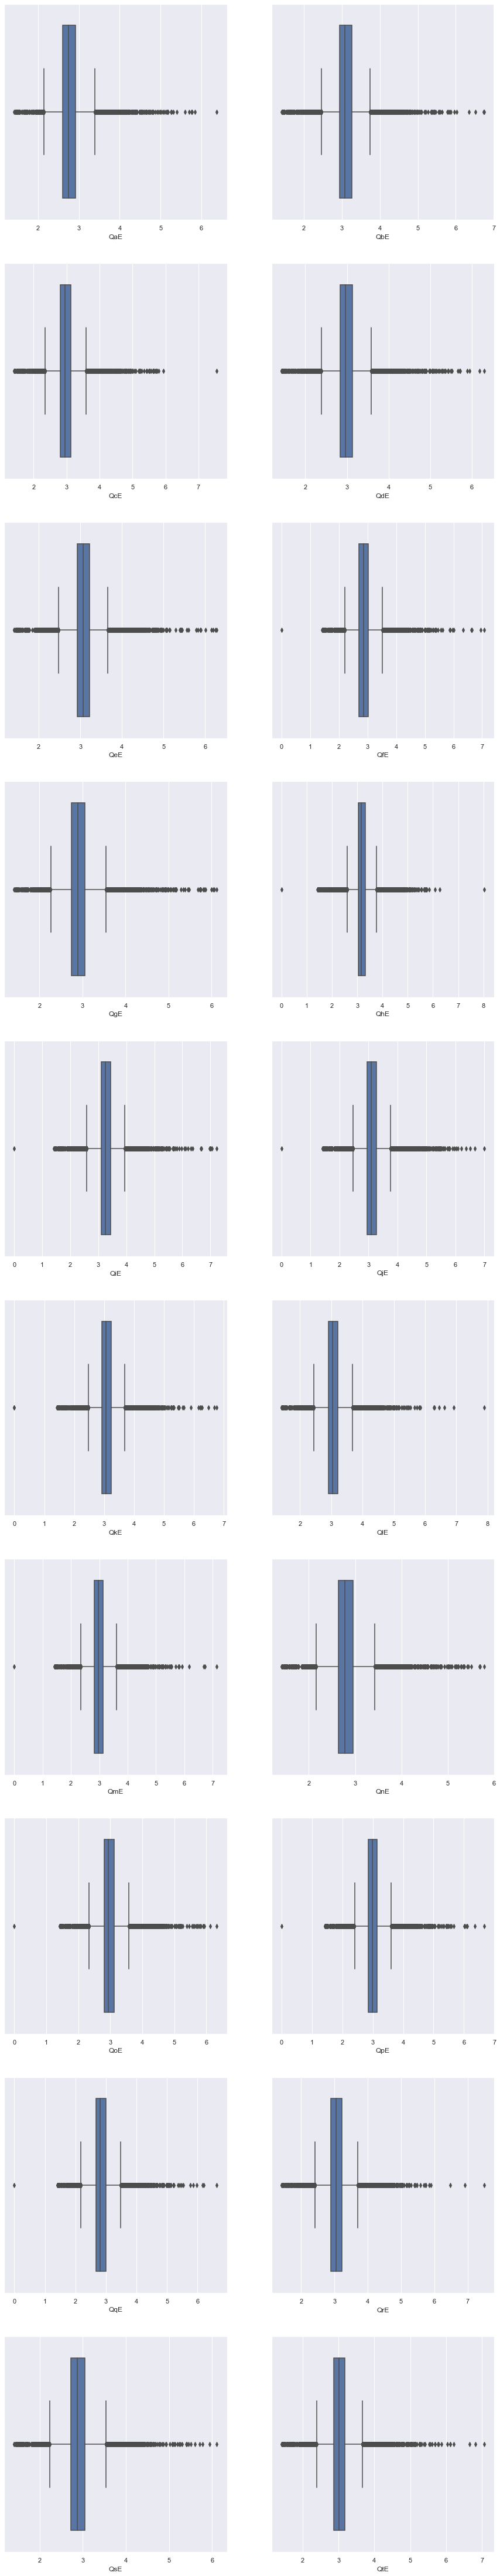

In [56]:
answer_time_data_log = np.log10(answer_time_data+1)
plt.figure(figsize =(15,80))
for idx, letter in enumerate(list('abcdefghijklmnopqrst')):
    plt.subplot(10,2,idx+1)
    sns.boxplot(answer_time_data_log['Q'+letter+'E'])

__신뢰구간 기준 정확한 이상치 수 ==> 4~5천 수준에서 절반 수준으로 줄긴 함 ==> 여전히 너무 많음__

In [57]:
answer_time_data_log.apply(trim_outlier)

QaE    1789
QbE    2511
QcE    2385
QdE    2516
QeE    3270
QfE    2070
QgE    2113
QhE    2821
QiE    2166
QjE    3007
QkE    2585
QlE    2180
QmE    2610
QnE    1953
QoE    2441
QpE    2483
QqE    1821
QrE    2537
QsE    2258
QtE    2479
dtype: int64

# 3. Summary

### 질문 답변 정보  
평균 점수가 한쪽으로 몰린 문항들이 몇개 있음  
- A,D,E,F,H ==> 2.5 미만  
- C,J,K,I,M ==> 3,5 이상

### 질문 답변시간 정보  
- 결측치(0) 는 극소수  
- 신뢰구간 기준 이상치는 칼럼별로 4\~5천개 수준 (7\~9%)  
- 데이터 스케일이 상당히 큼 (10^1 ~10^7)  
- 로그 스케일 변환 시 칼럼별 2천 정도의 이상치 (3.5%)  

# 4. 개인적으로 생각해본 사항들

In [4]:
# 중복을 제외하고 총합 몇개의 행이 이상치를 가지고 있는가
# 질문을 모두 응답하는데에 평균적으로 걸리는 시간이 정규성을 띌까